This is a toy example of the use of Kepler Mapper. We will start by constructing a collection of points sampled from a unit circle.

In [1]:
# uncomment and run this if you are on colab
# !pip install pyballmapper

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
%matplotlib inline

## Generate data

In [3]:
pointcloud = np.array([[np.cos(x), np.sin(x)] for x in np.arange(0, 6.3, 0.1)])
points_df = pd.DataFrame(pointcloud, columns=["x", "y"])

angle_df = pd.DataFrame(np.arange(0, 6.3, 0.1), columns=["angle"])

points_df.head()

,x,y
0,1.000000,0.000000
1,0.995004,0.099833
2,0.980067,0.198669
3,0.955336,0.295520
4,0.921061,0.389418


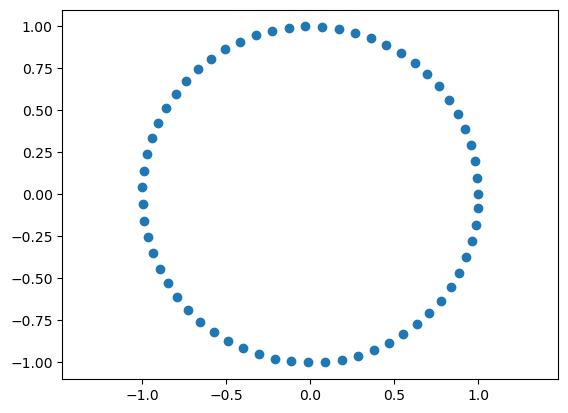

In [21]:
plt.scatter(points_df.x, points_df.y)
plt.axis("equal")
plt.show()

## Kepler mapper

![](img/mapper_illustration_knot_paper_NEW.png)

In [14]:
import kmapper as km
from sklearn import cluster

In [15]:
mapper = km.KeplerMapper(verbose=1)

KeplerMapper(verbose=1)


In [16]:
# project on the y axis
projected_data = mapper.fit_transform(points_df.to_numpy(), projection=[1])

..Composing projection pipeline of length 1:
	Projections: [1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (63, 2)

..Projecting data using: [1]

..Scaling with: MinMaxScaler()



In [17]:
# Create a cover with 10 elements
cover = km.Cover(n_cubes=10)

In [18]:
# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(
    X=points_df.to_numpy(),
    lens=projected_data,
    cover=cover,
    clusterer=cluster.DBSCAN(eps=0.5, min_samples=3),
)

Mapping on data shaped (63, 2) using lens shaped (63, 1)

Creating 10 hypercubes.

Created 18 edges and 18 nodes in 0:00:00.011503.


In [19]:
# Visualize it
mapper.visualize(graph, path_html="output/keplermapper_circle.html")

Wrote visualization to: output/keplermapper_circle.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh